# Código Informe Ejecutivo

<h1>Contexto</h1>


Bob ha iniciado su propia compañía de teléfonos móviles. Quiere competir ferozmente con grandes compañías como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que su compañía crea. En este competitivo mercado de teléfonos móviles no se pueden simplemente asumir las cosas. Para resolver este problema, ha recopilado datos de ventas de teléfonos móviles de varias compañías.

Bob quiere encontrar alguna relación entre las características de un teléfono móvil (por ejemplo: RAM, Memoria Interna, etc.) asi que necesita tu ayuda para resolver este problema.

En este problema Bob no requiere  que se prediga el precio exacto, sino un rango de precios que indique cuán alto es el precio.

<h1>Analisis descriptivo</h1>


paso1 carga de las librerias

In [559]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

paso2 carga y visualizacion de la base de datos 





In [560]:
import pandas as pd
archivo_csv = 'C:/Users/Usuario/Music/informe/informetoma2/telfonico.csv'
df = pd.read_csv(archivo_csv)
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [561]:
df.shape

(2000, 21)

In [562]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**battery_power:** La capacidad de la batería del teléfono, medida en mAh (miliamperios-hora).


**blue:** Indica si el teléfono tiene capacidad Bluetooth (1 si tiene, 0 si no).


**clock_speed:** La velocidad del procesador del teléfono en GHz (gigahercios).


**dual_sim:** Indica si el teléfono tiene capacidad para dos tarjetas SIM (1 si tiene, 0 si no).


**fc:** La cantidad de megapíxeles de la cámara frontal del teléfono.


**four_g:** Indica si el teléfono es compatible con redes 4G (1 si es compatible, 0 si no).


**int_memory:** La cantidad de memoria interna del teléfono, medida en GB (gigabytes).


**m_dep:** La profundidad del teléfono en cm (centímetros).


**mobile_wt:** El peso del teléfono en gramos.


**n_cores:** El número de núcleos del procesador del teléfono.


**pc:** La cantidad de megapíxeles de la cámara principal del teléfono.


**px_height:** La altura de resolución de la pantalla del teléfono en píxeles.


**px_width:** La anchura de resolución de la pantalla del teléfono en píxeles.


**ram:** La cantidad de memoria RAM del teléfono, medida en MB (megabytes).


**sc_h:** La altura de la pantalla del teléfono en cm (centímetros).


**sc_w:** La anchura de la pantalla del teléfono en cm (centímetros).


**talk_time:** La duración de la batería en tiempo de conversación en horas.


**three_g:** Indica si el teléfono es compatible con redes 3G (1 si es compatible, 0 si no).


**touch_screen:** Indica si el teléfono tiene pantalla táctil (1 si tiene, 0 si no).


**wifi:** Indica si el teléfono tiene capacidad de conexión Wi-Fi (1 si tiene, 0 si no).


**price_range:** El rango de precio del teléfono, que podría ser un valor discreto o categoría que indica diferentes niveles de precio (por ejemplo, bajo, medio, alto).

In [563]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


a continuacion queremos entender el comportamiento de las variables categoricas viendo los valores unicos para asi comprender que tantas categorias tienen estas variables y comprender el contexto de las mismas

In [564]:
print("\nValores únicos en cada columna:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Columna {column}: {unique_values}")


Valores únicos en cada columna:
Columna battery_power: [ 842 1021  563 ... 1139 1467  858]
Columna blue: [0 1]
Columna clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Columna dual_sim: [0 1]
Columna fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Columna four_g: [0 1]
Columna int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Columna m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Columna mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 17

Columna three_g: [0 1] : si o no 

Columna touch_screen: [0 1]:si o no 

Columna wifi: [1 0]: si o no 

Columna price_range: [1 2 3 0]

Columna blue: [0 1]:si o no

Columna dual_sim: [0 1]:si o no 

Columna four_g: [0 1]: si o no 

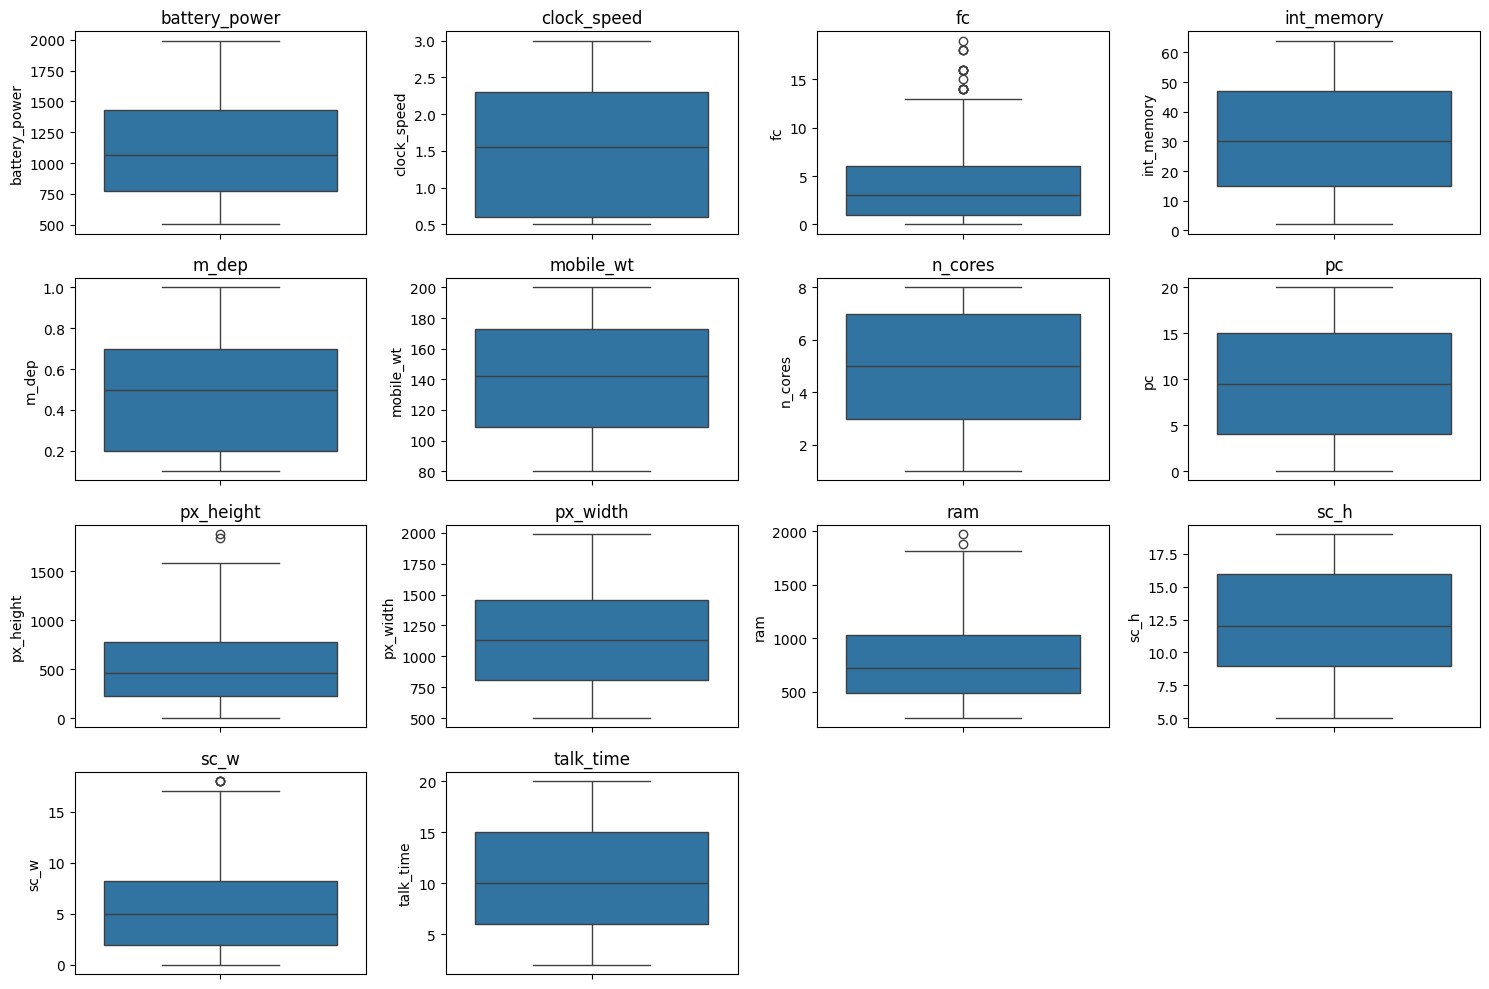

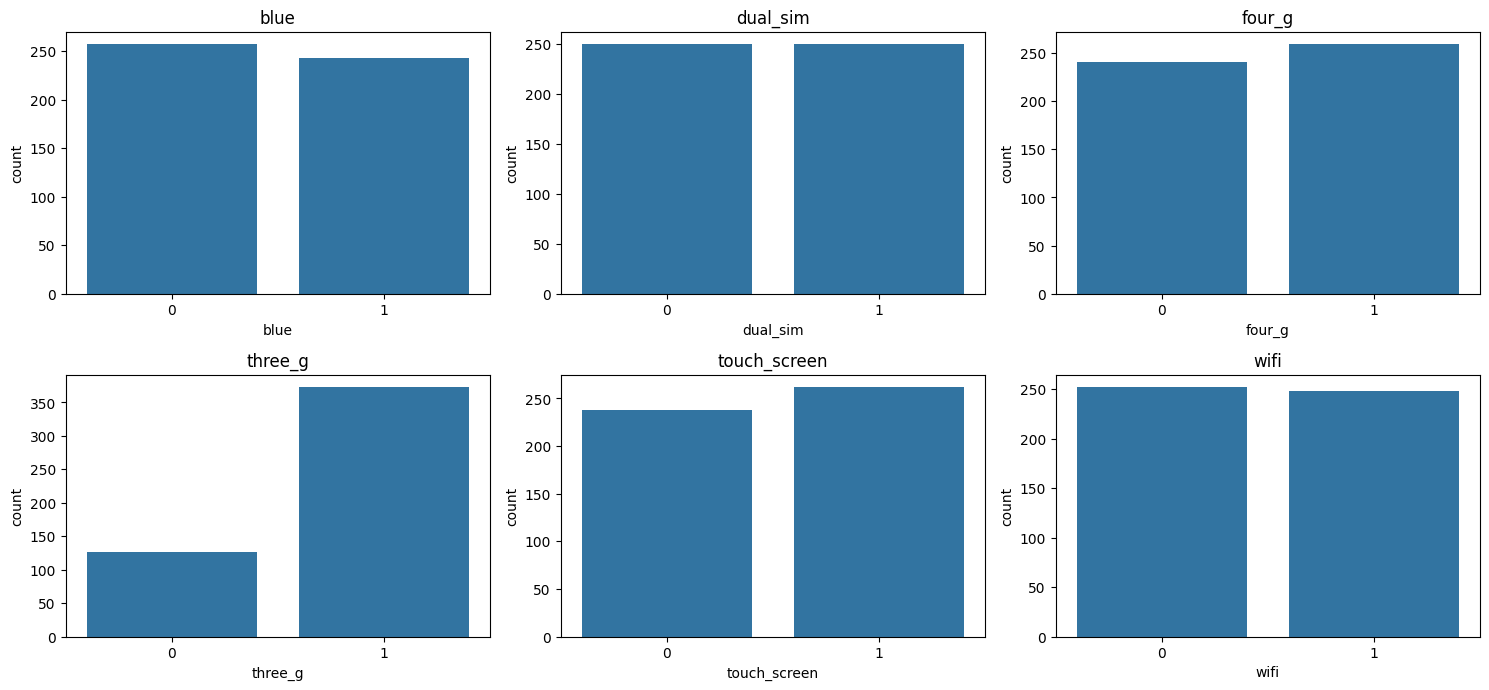

In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrado del DataFrame para price_range == 0
df_price_range_0 = df[df['price_range'] == 0]

#variables numéricas
numerical_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
    'ram', 'sc_h', 'sc_w', 'talk_time'
]
#variables categoricas
categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'
]

# Crear gráficos para variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

# Crear gráficos para variables categóricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

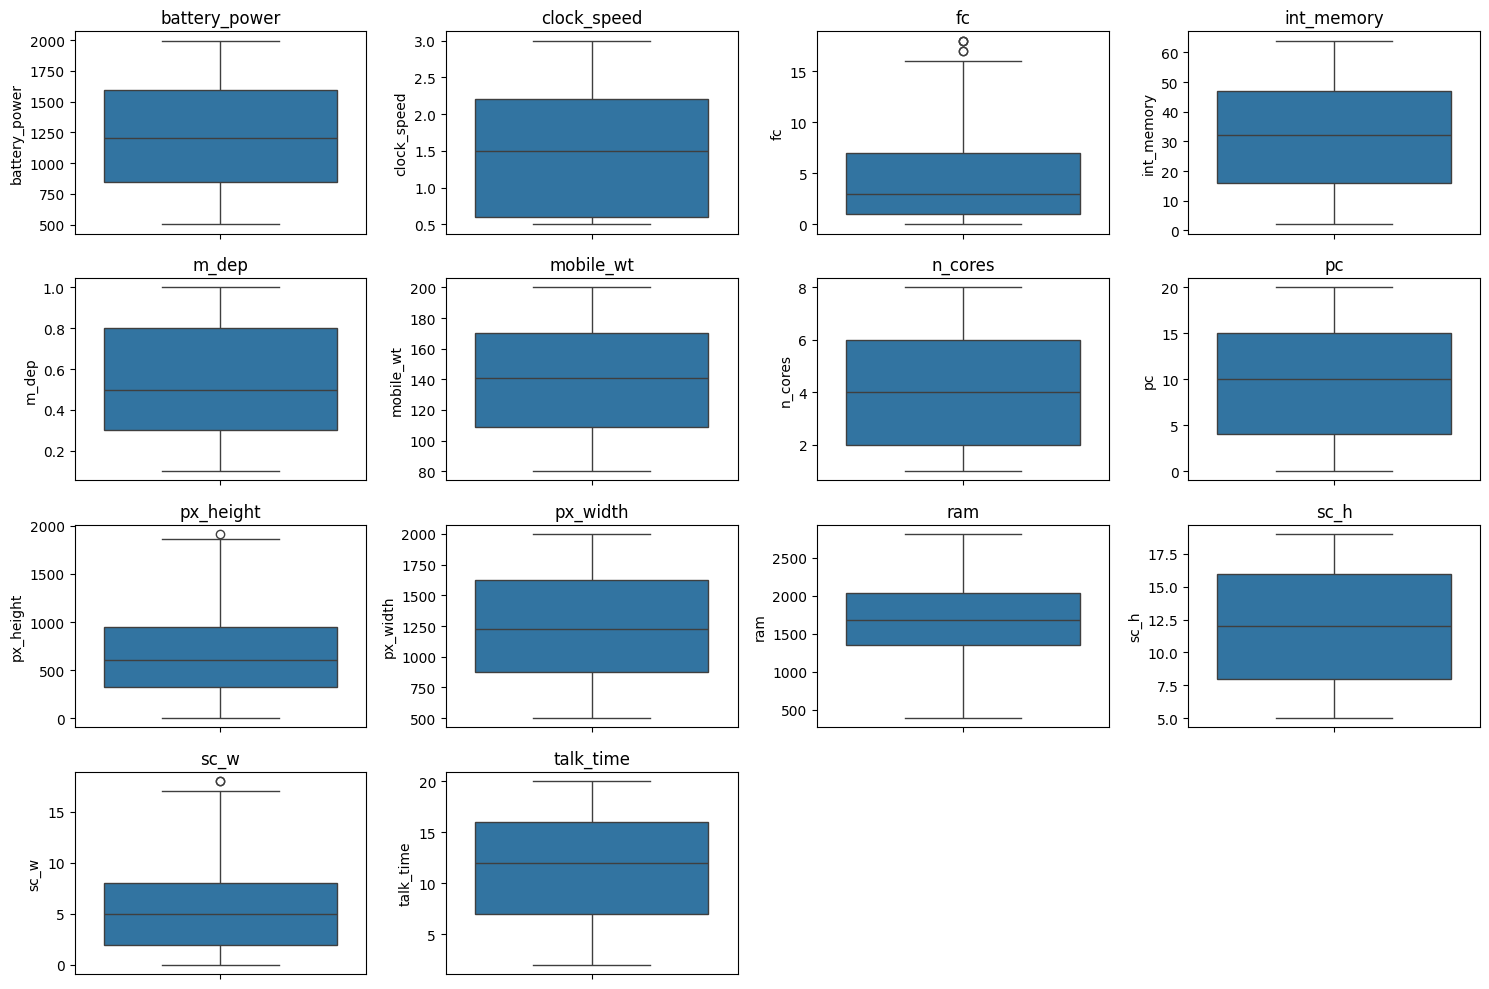

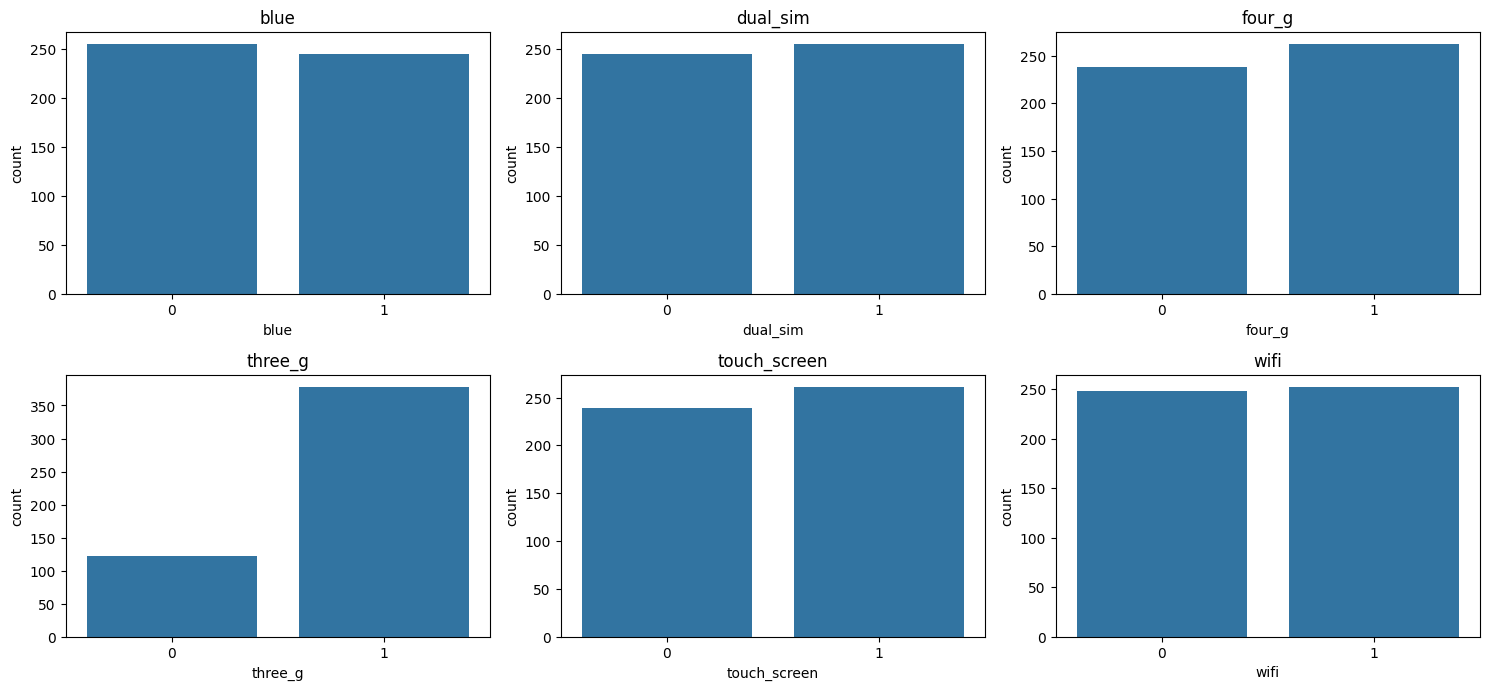

In [566]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrado del DataFrame para price_range == 0
df_price_range_0 = df[df['price_range'] == 1]

#variables numéricas
numerical_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
    'ram', 'sc_h', 'sc_w', 'talk_time'
]
#variables categoricas
categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'
]

# Crear gráficos para variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

# Crear gráficos para variables categóricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

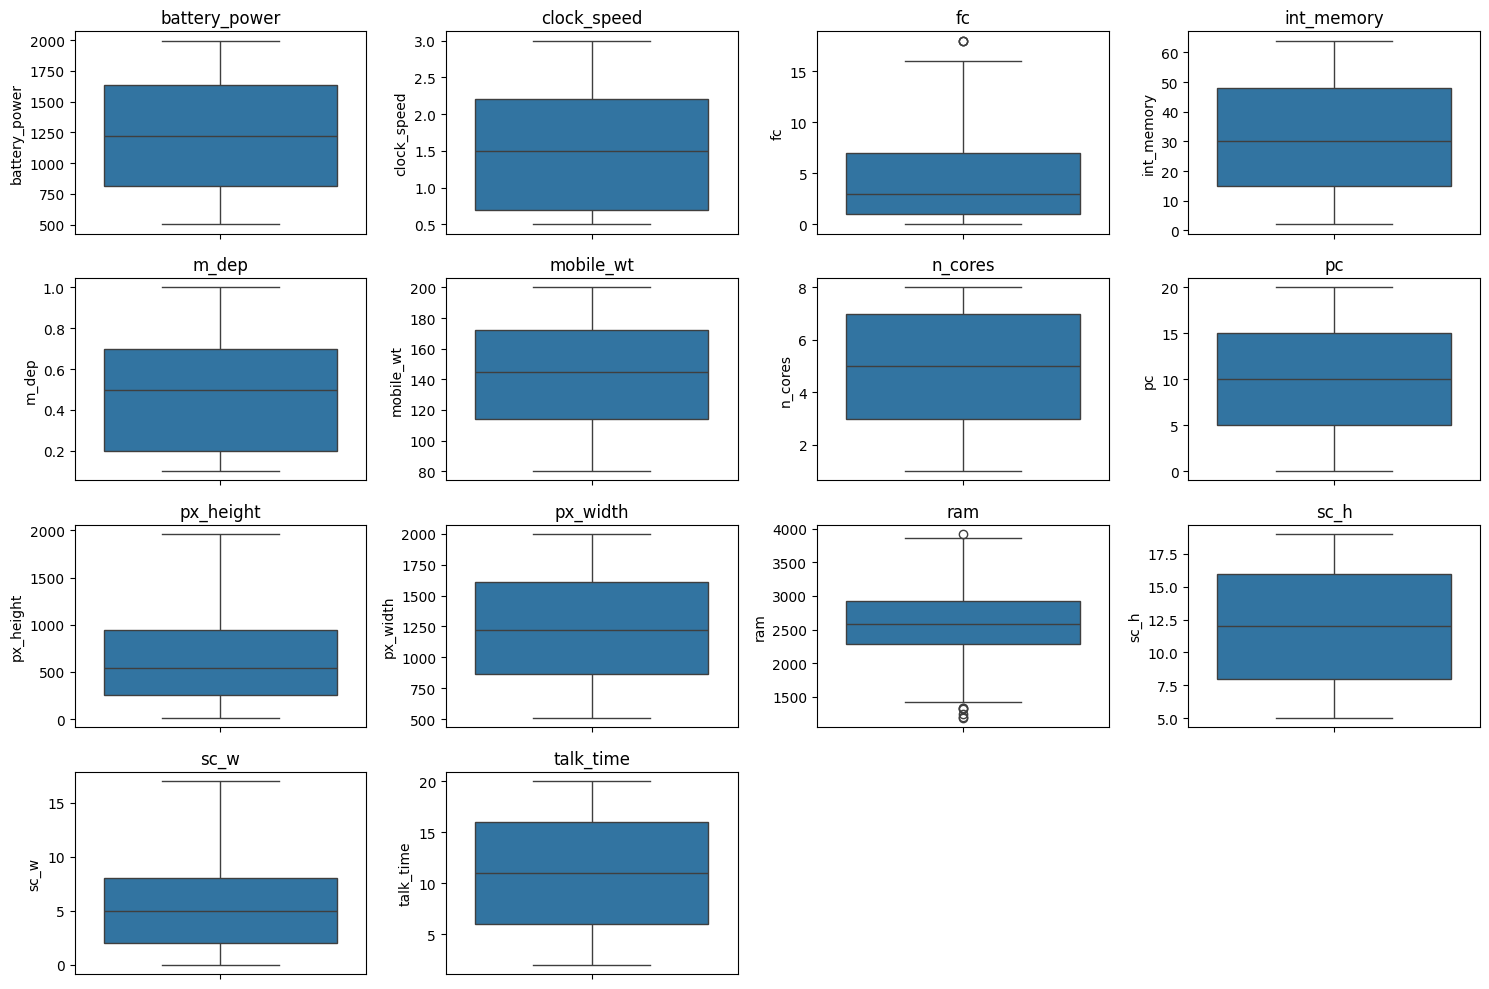

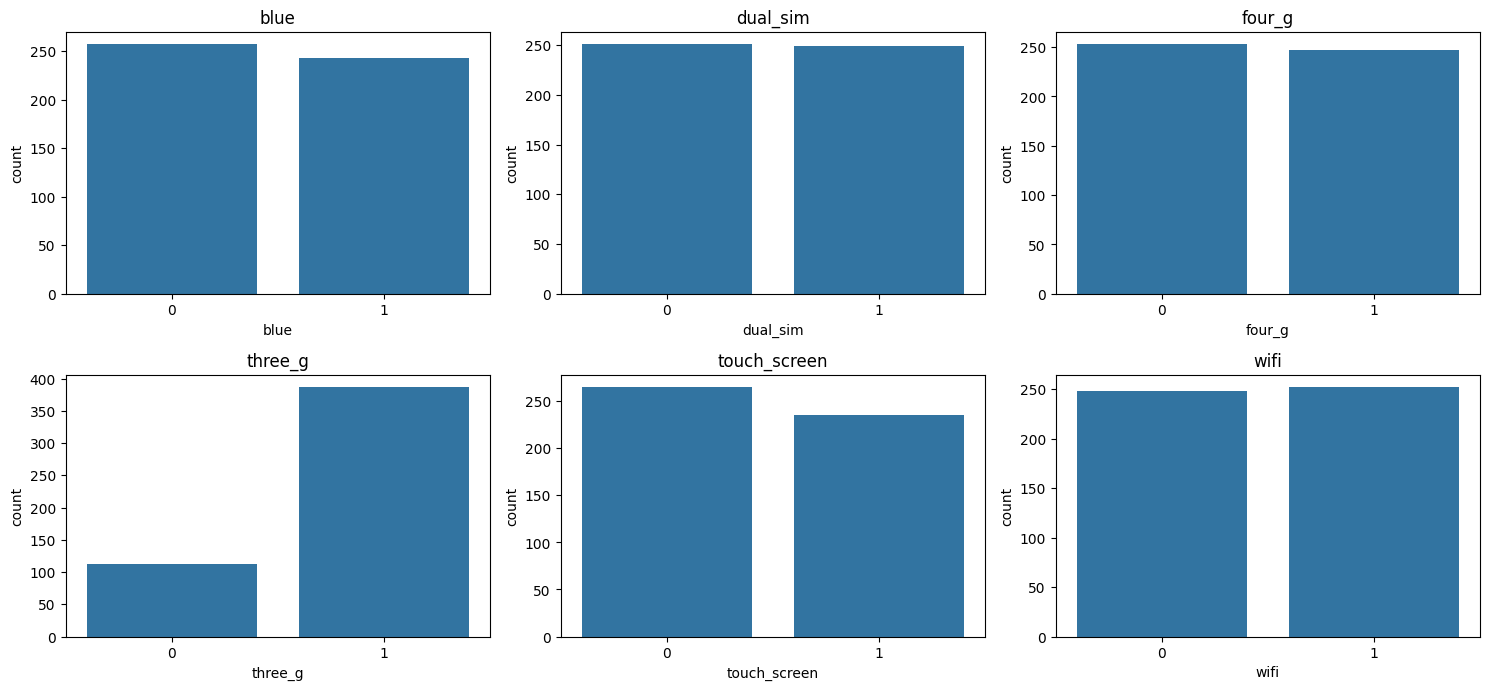

In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrado del DataFrame para price_range == 0
df_price_range_0 = df[df['price_range'] == 2]

#variables numéricas
numerical_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
    'ram', 'sc_h', 'sc_w', 'talk_time'
]
#variables categoricas
categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'
]

# Crear gráficos para variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

# Crear gráficos para variables categóricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

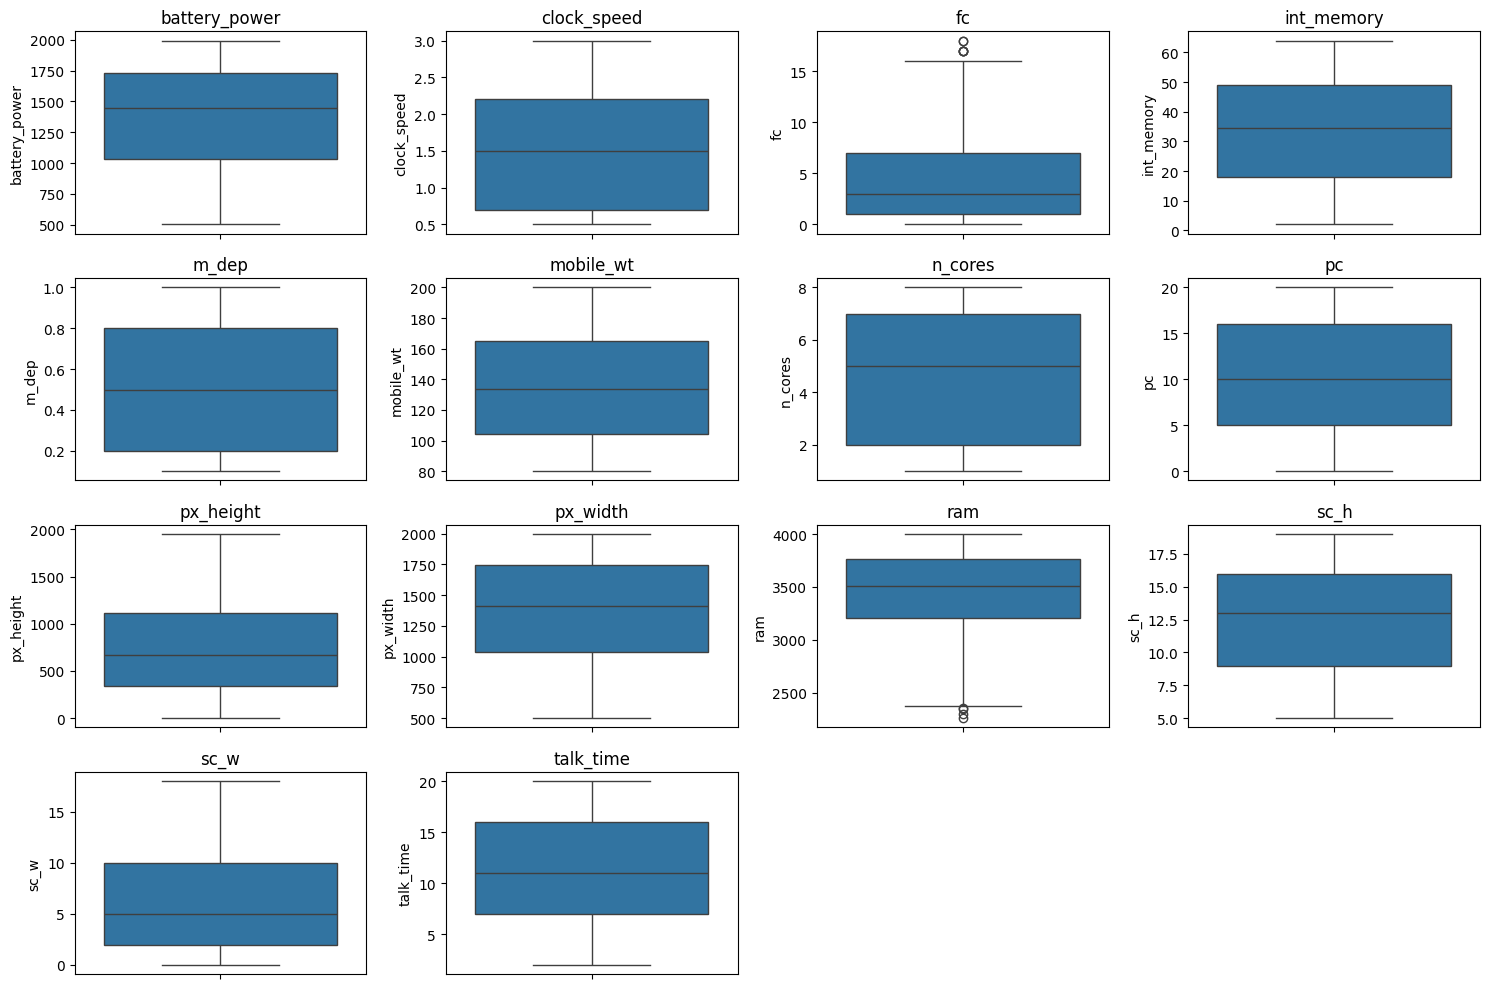

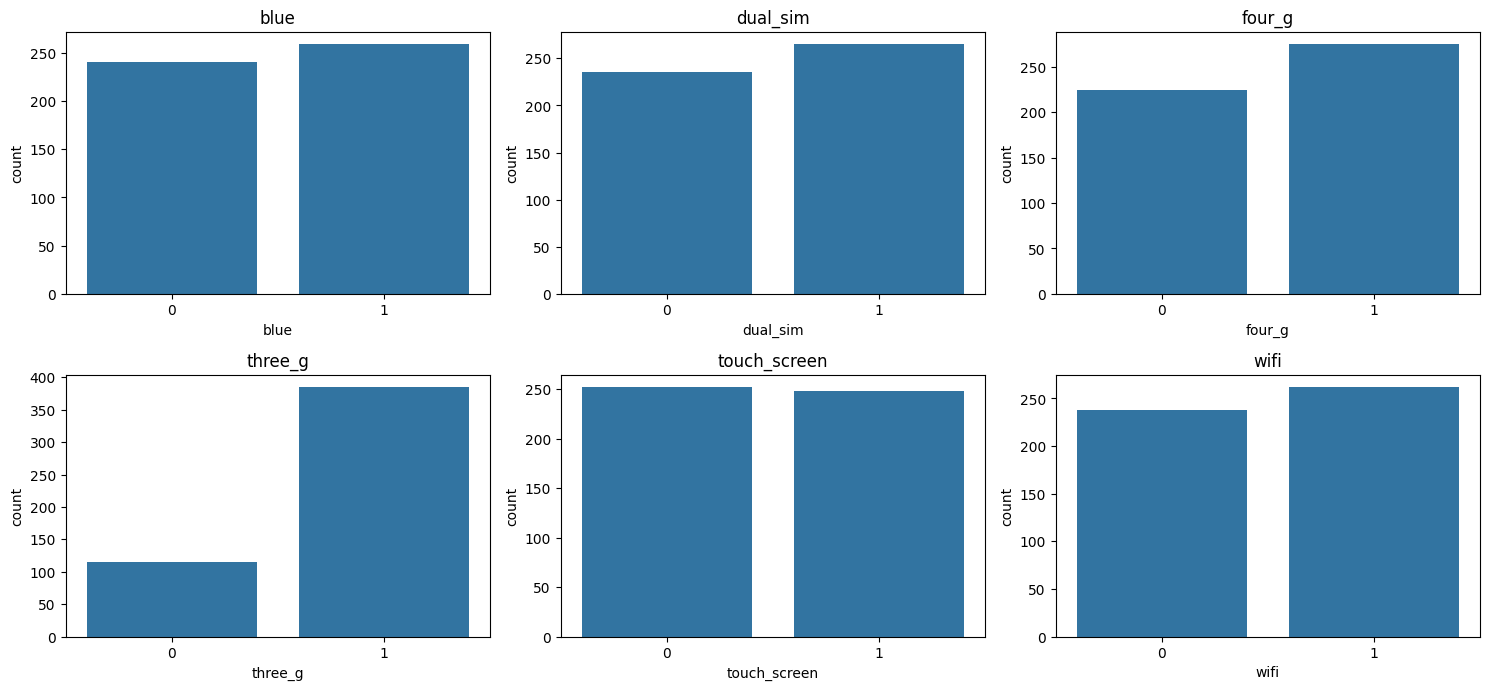

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrado del DataFrame para price_range == 0
df_price_range_0 = df[df['price_range'] == 3
                      ]

#variables numéricas
numerical_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
    'ram', 'sc_h', 'sc_w', 'talk_time'
]
#variables categoricas
categorical_columns = [
    'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'
]

# Crear gráficos para variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

# Crear gráficos para variables categóricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df_price_range_0)
    plt.title(column)
plt.tight_layout()
plt.show()

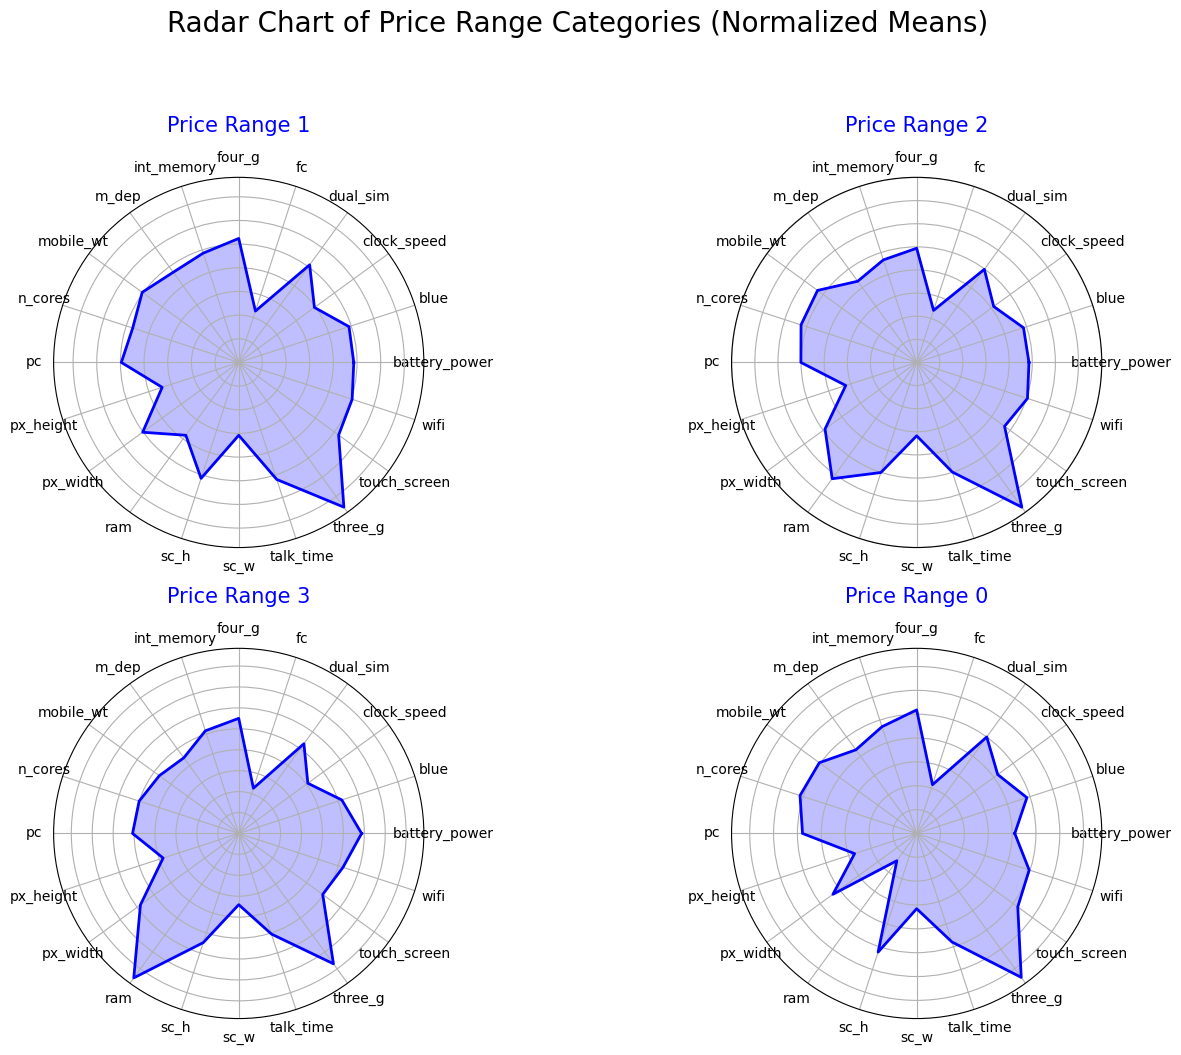

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df cargado
# df = pd.read_csv('ruta/a/tu/archivo.csv')

# Normalizar los datos para compararlos en el radar chart
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Normalizar los datos excepto la columna 'price_range'
df_normalized = df.copy()
features = df.columns.drop('price_range')
df_normalized[features] = normalize(df[features])

# Crear un radar chart para cada categoría de 'price_range'
categories = df['price_range'].unique()
num_vars = len(features)

# Angulos para el radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(14, 10))

for i, ax in enumerate(axs.flatten()):
    category = categories[i]
    data = df_normalized[df_normalized['price_range'] == category][features].mean().tolist()
    data += data[:1]  # Cerrar el círculo

    ax.fill(angles, data, color='b', alpha=0.25)
    ax.plot(angles, data, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)

    ax.set_title(f'Price Range {category}', size=15, color='b', y=1.1)

plt.suptitle('Radar Chart of Price Range Categories (Normalized Means)', size=20, y=1.05)
plt.tight_layout()
plt.show()


**<h1>Entendimiento del negocio y/o los productos</h1>**

**productos de gama baja (price range 0):** los producto de esta gama son telefonos con poca bateria,una capacidad de memoria RAM casi que minima para el funcionamiento del telfono , mas numero de nucleos lo que puede referirse a que son telefonos con procesadores  que requieren de mas ayuda para funcionar bien, poseen poca memoria interna y menor altura en la resolucion de la pantalla.

**producto de gama media (price range 1):** estos telefonos resaltan en que poseen claramente mas ram que la gama baja ademas de ser telefono un poo mas pesados , manteniendo el mismo numero de nucleos del procesador y ms poder en la bateria.

**producto de gama alta (price range 2):** estos telefonos son mas delgados que los de la gamma media y baja , ademas la bateria se mantiene en la misma media de bateria  y tiene mas memoria interna  ademas  de memoria RAM.

**producto de gama premium (price range 3):** son telefonos  con bastantes menos numero de nucleos en los procesadores , mas livinos , mas memoria interna , capacidad de la bateria mucho mas alta y capacidad de la ram muy alta.


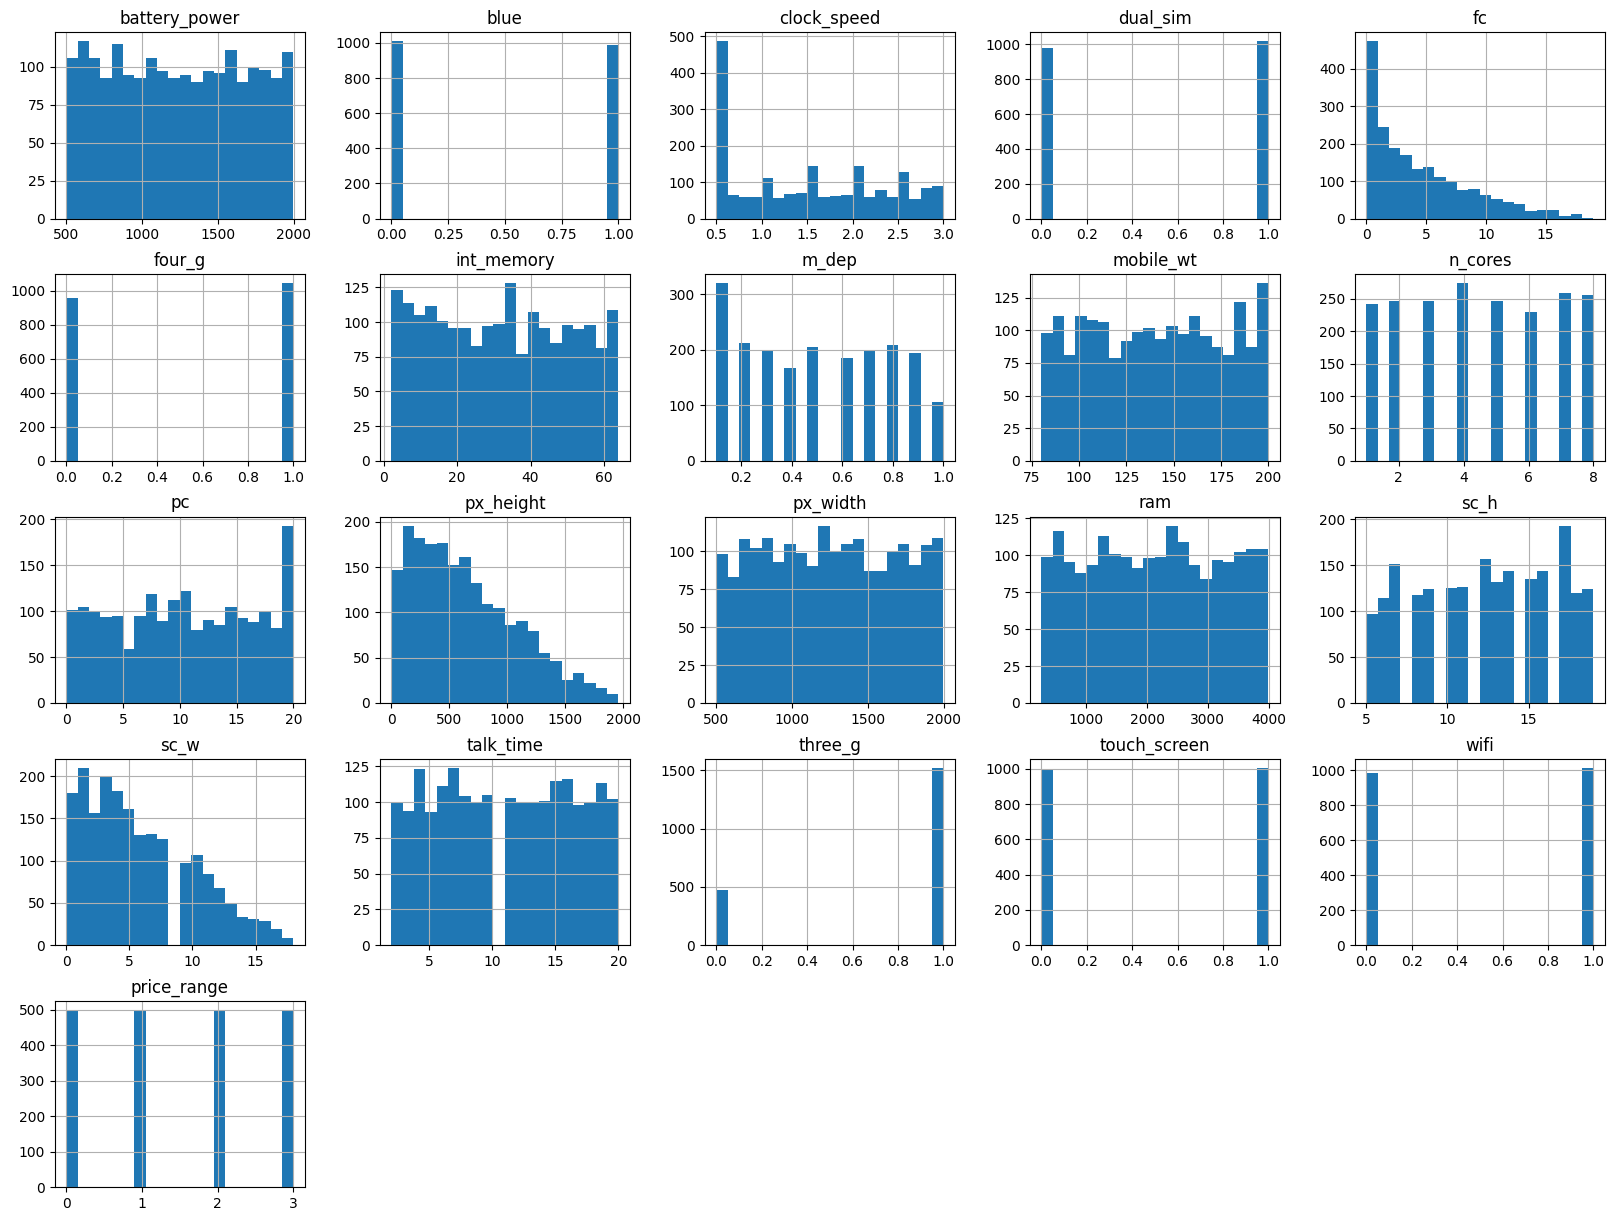

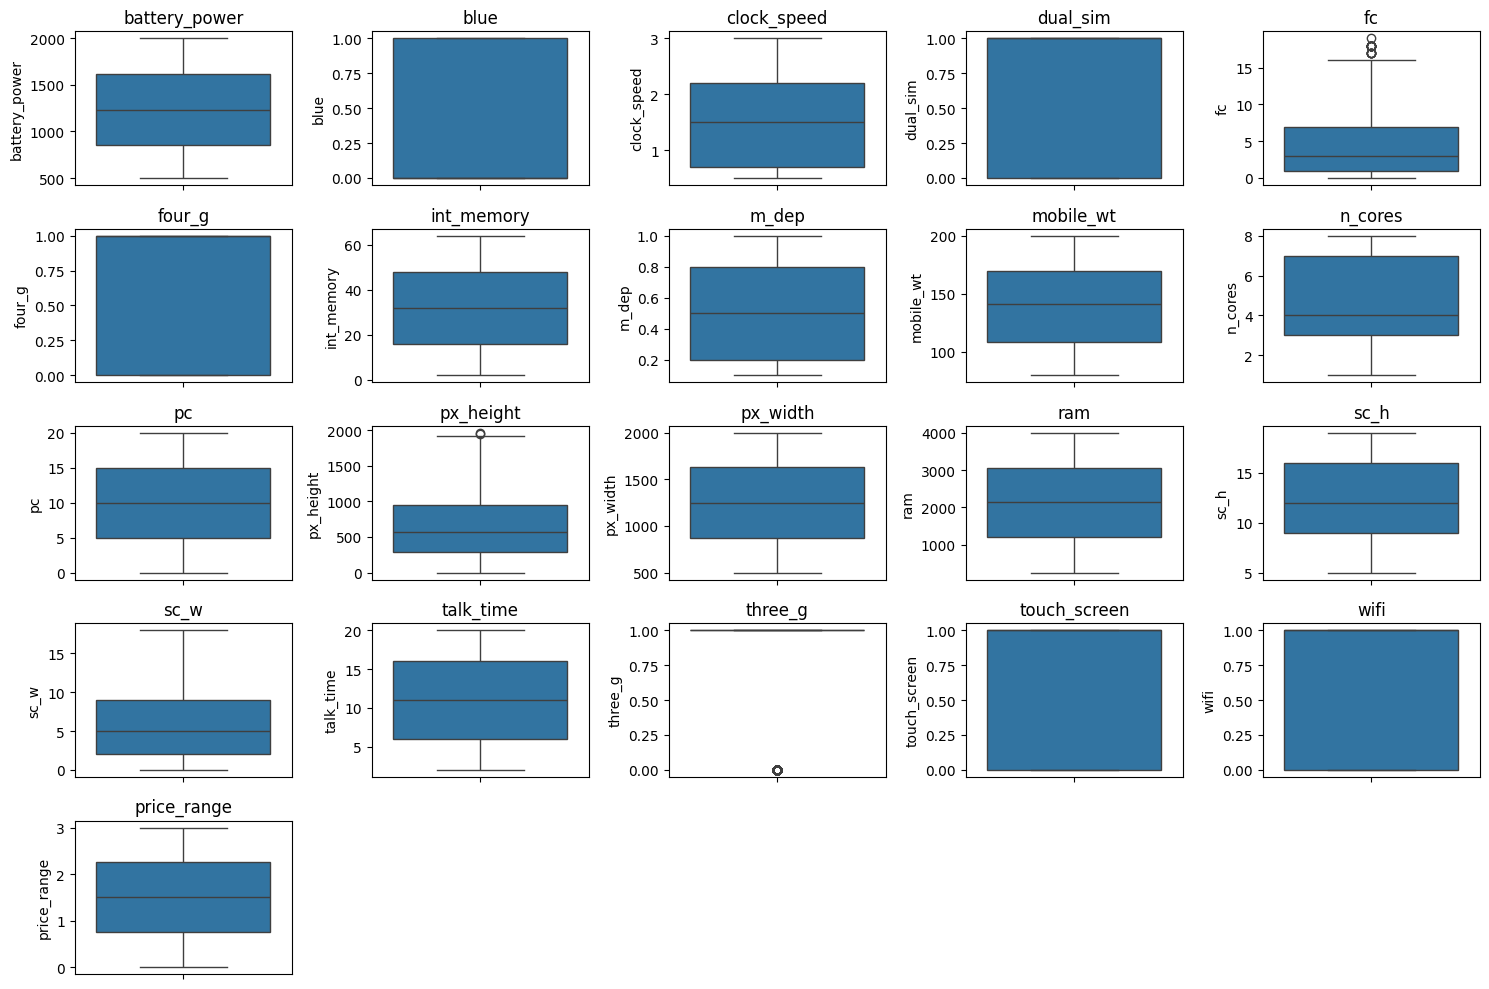

In [570]:
# Histogramas para ver la distribución
df.hist(bins=20, figsize=(20,15))
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(15,10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(5, 5, i)  # Ajustar según la cantidad de columnas
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

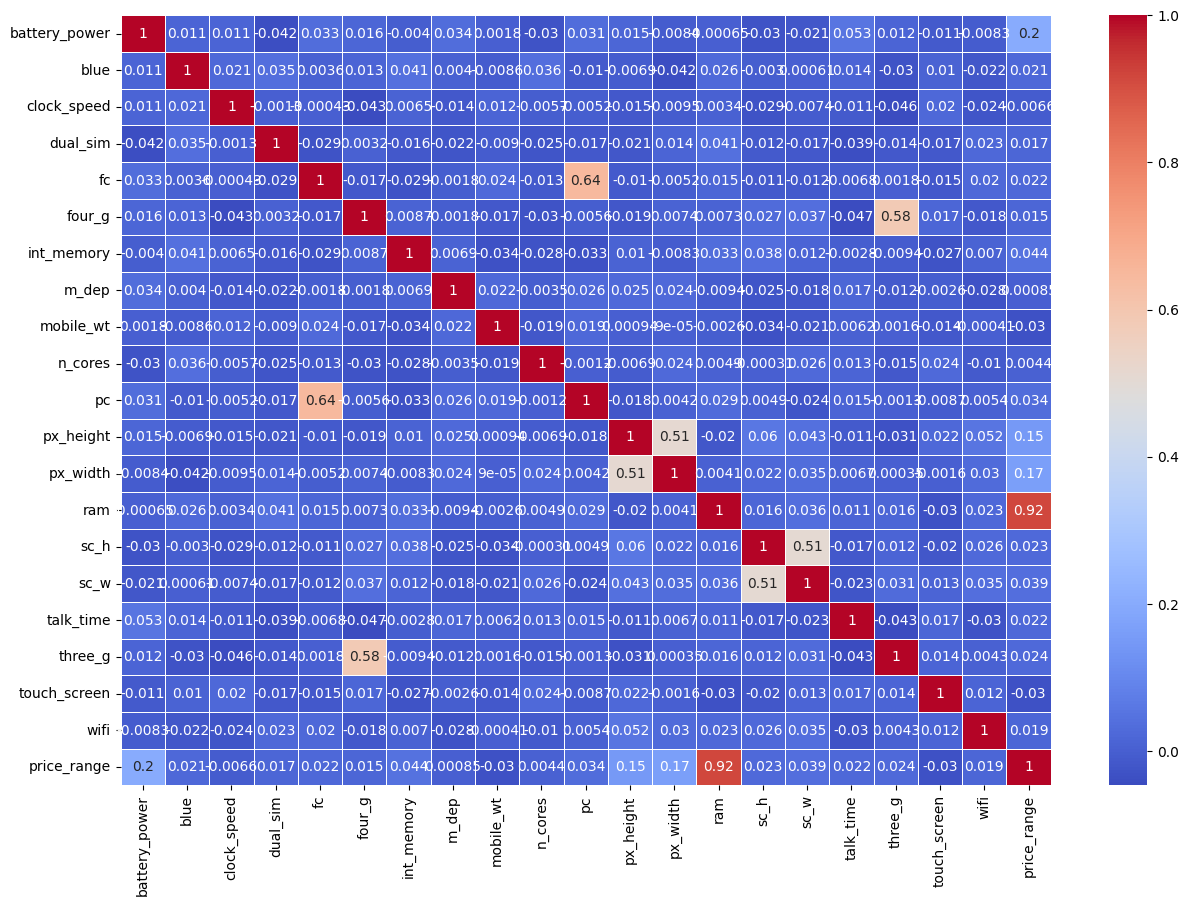

In [571]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [572]:
y = df['price_range']
X = df.drop(columns=['price_range', 'blue', 'dual_sim', 'touch_screen', 'wifi','clock_speed','m_dep','touch_screen','wifi'])

In [573]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
lr = LogisticRegression(random_state = 42)

In [574]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [575]:
y_pred_lr = lr.predict(X_test)

In [576]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)

In [577]:
accuracy

0.6283333333333333

Hasta este punto podemos comprender como el mejor  valor con el estado actual de los datos es de 64% de  precision para el modelo , podemos concluir de esto que puede deberse al estado de los datos asi que trataremos de eliminar atipicos de algunas variables cpn alta correlacion para normalizar sus distribuciones 


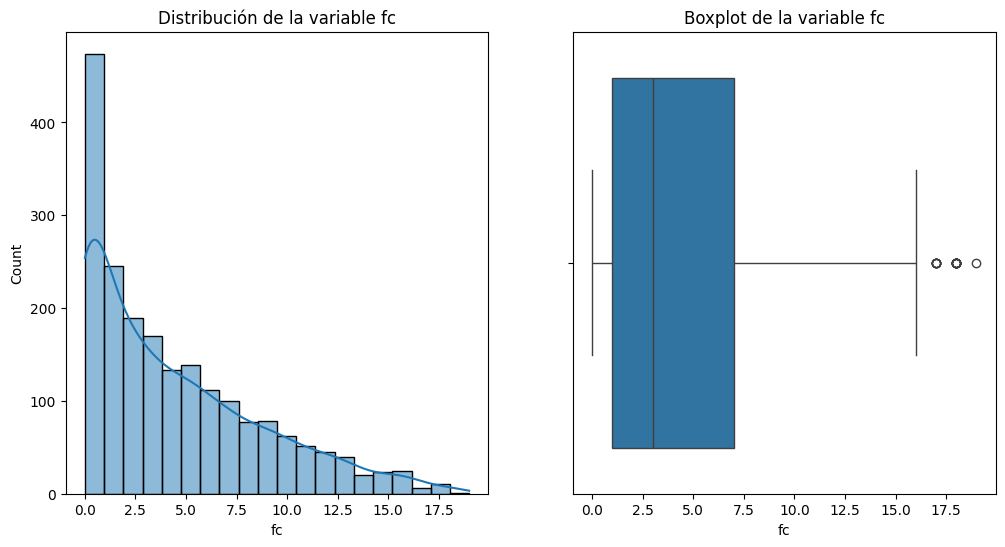

In [578]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame cargado como df
# df = pd.read_csv('data.csv')  # Si fuera necesario cargar el DataFrame desde un archivo

# Visualizar la distribución de la variable `fc`
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['fc'], bins=20, kde=True)
plt.title('Distribución de la variable fc')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['fc'])
plt.title('Boxplot de la variable fc')

plt.show()



VARIABLE PC VISUALIZACION Y TRANSFORMACION

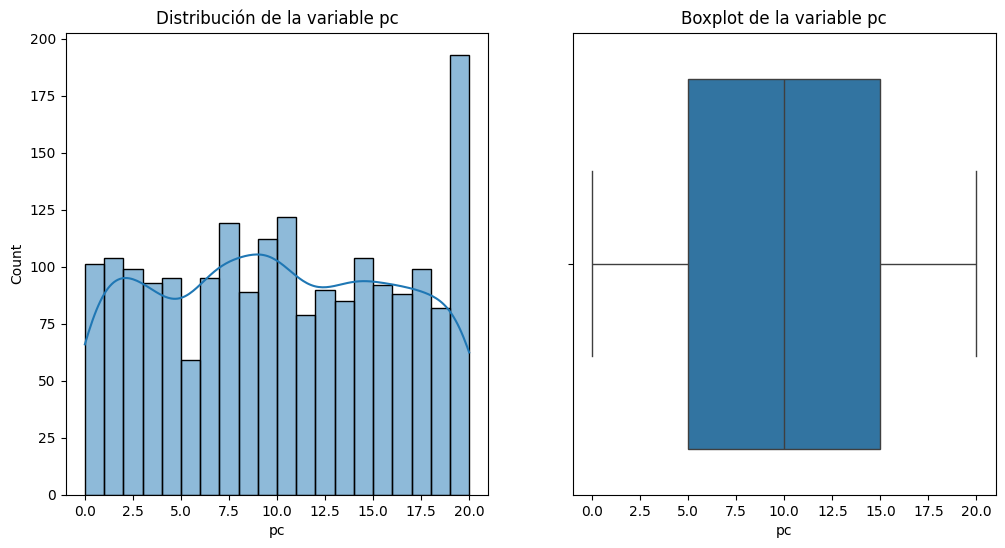

In [579]:
# Visualizar la distribución de la variable `pc`
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['pc'], bins=20, kde=True)
plt.title('Distribución de la variable pc')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['pc'])
plt.title('Boxplot de la variable pc')

plt.show()


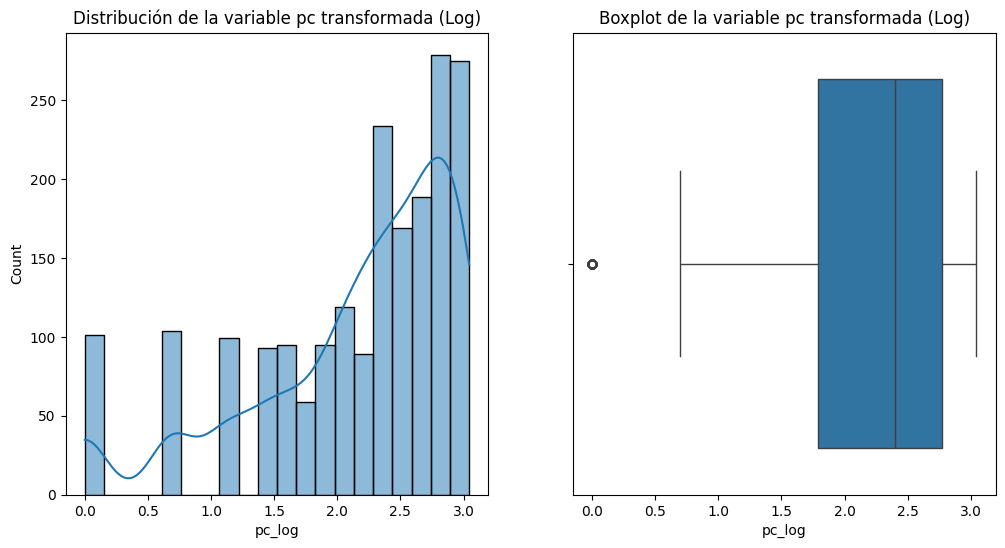

In [580]:
import numpy as np

# Verificamos si la columna 'pc' existe en el DataFrame
if 'pc' in df.columns:
    # Transformación Logarítmica
    df['pc_log'] = np.log1p(df['pc'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['pc_log'], bins=20, kde=True)
    plt.title('Distribución de la variable pc transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['pc_log'])
    plt.title('Boxplot de la variable pc transformada (Log)')

    plt.show()
else:
    print("La columna 'pc' no se encuentra en el DataFrame")




VARIABLE PX HEIGHT

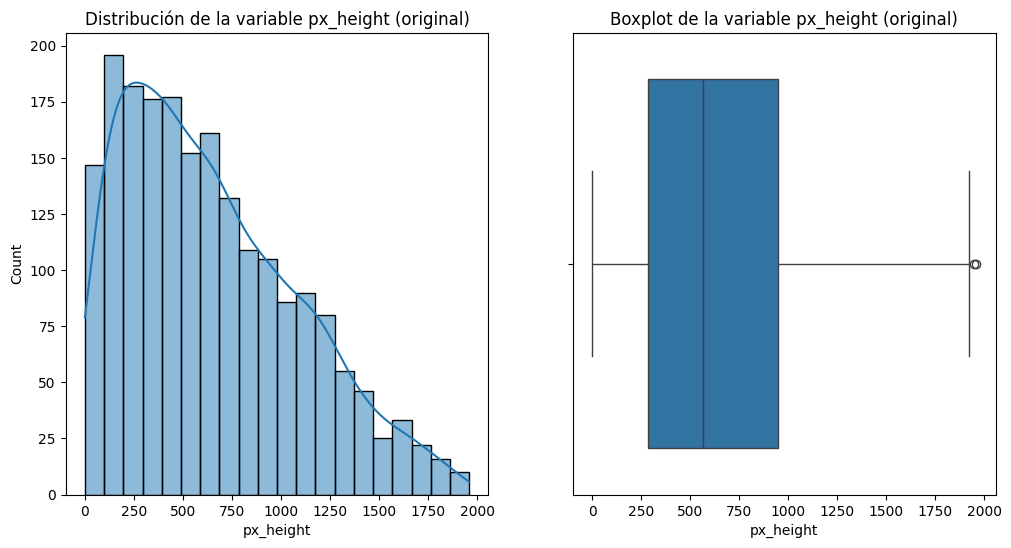

In [581]:
# Visualizar la distribución de la variable `px_height`
plt.figure(figsize=(12, 6))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df['px_height'], bins=20, kde=True)
plt.title('Distribución de la variable px_height (original)')

# Boxplot original
plt.subplot(1, 2, 2)
sns.boxplot(x=df['px_height'])
plt.title('Boxplot de la variable px_height (original)')

plt.show()

VARAIBLE PX WIDTH VISUALIZACION Y TRANSFORMACION

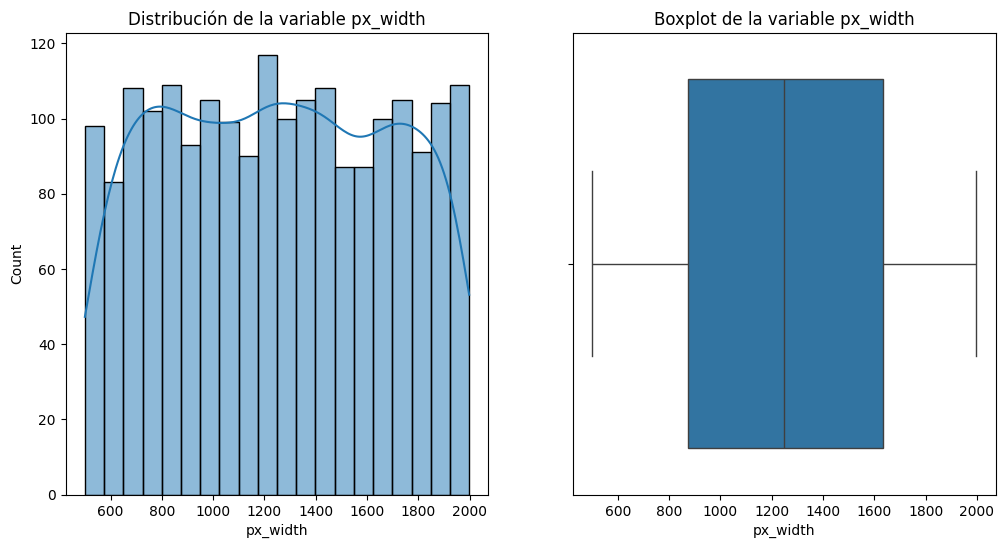

In [582]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
# Si no lo has cargado aún, puedes cargarlo así (ajusta la ruta del archivo):
# df = pd.read_csv('ruta/al/archivo.csv')

# Asegúrate de que la columna 'px_width' esté en el DataFrame
if 'px_width' in df.columns:
    plt.figure(figsize=(12, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df['px_width'], bins=20, kde=True)
    plt.title('Distribución de la variable px_width')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['px_width'])
    plt.title('Boxplot de la variable px_width')

    plt.show()
else:
    print("La columna 'px_width' no se encuentra en el DataFrame")

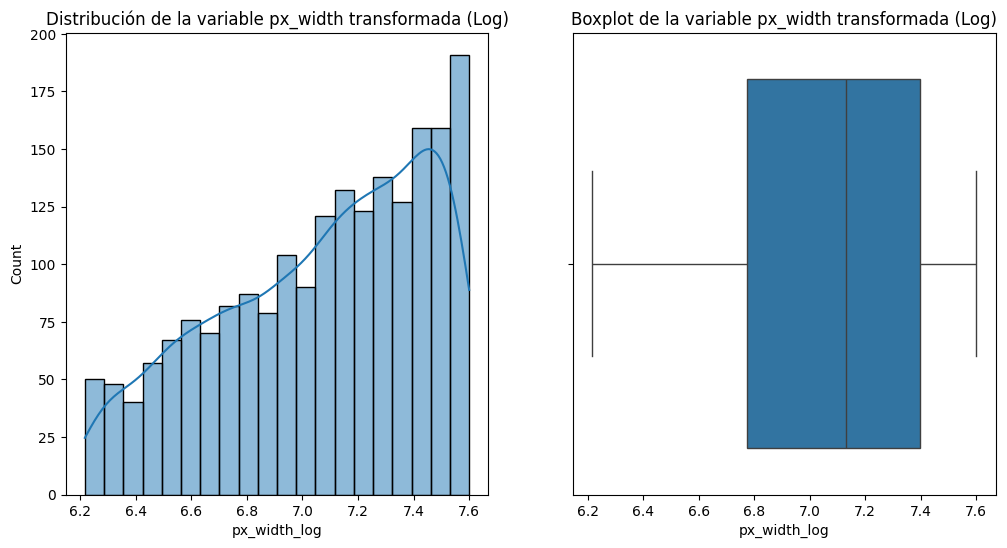

In [583]:
import numpy as np

# Verificamos si la columna 'px_width' existe en el DataFrame
if 'px_width' in df.columns:
    # Transformación Logarítmica
    df['px_width_log'] = np.log1p(df['px_width'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['px_width_log'], bins=20, kde=True)
    plt.title('Distribución de la variable px_width transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['px_width_log'])
    plt.title('Boxplot de la variable px_width transformada (Log)')

    plt.show()
else:
    print("La columna 'px_width' no se encuentra en el DataFrame")


VARIABLE RAM

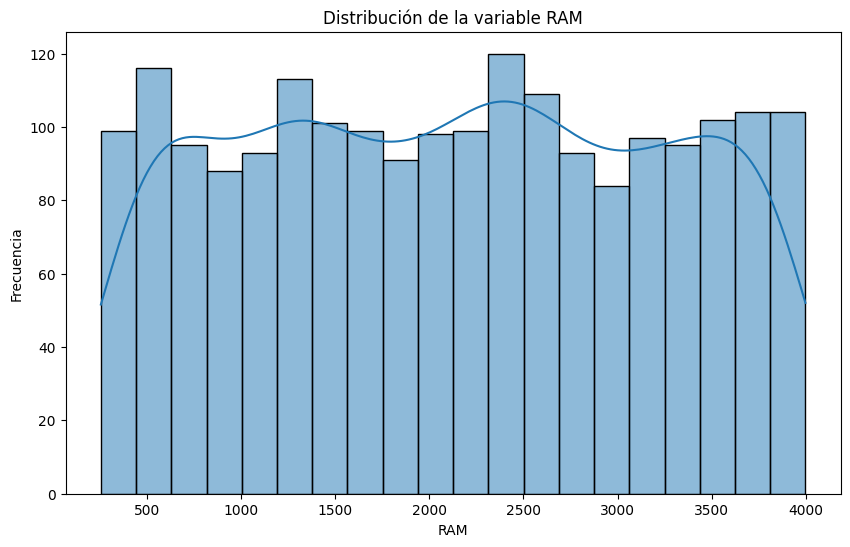

In [584]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable 'ram'
plt.figure(figsize=(10, 6))
sns.histplot(df['ram'], bins=20, kde=True)
plt.title('Distribución de la variable RAM')
plt.xlabel('RAM')
plt.ylabel('Frecuencia')
plt.show()

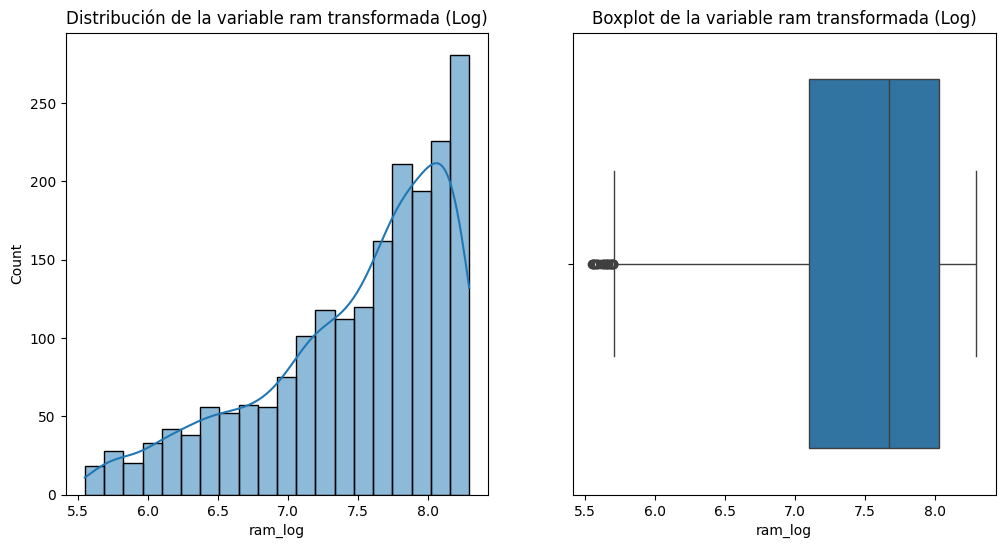

In [585]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import ndtri

# Verificamos si la columna 'ram' existe en el DataFrame
if 'ram' in df.columns:
    # Transformación Logarítmica
    df['ram_log'] = np.log1p(df['ram'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['ram_log'], bins=20, kde=True)
    plt.title('Distribución de la variable ram transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['ram_log'])
    plt.title('Boxplot de la variable ram transformada (Log)')

    plt.show()
else:
    print("La columna 'ram' no se encuentra en el DataFrame")



VARIABLE SC H 


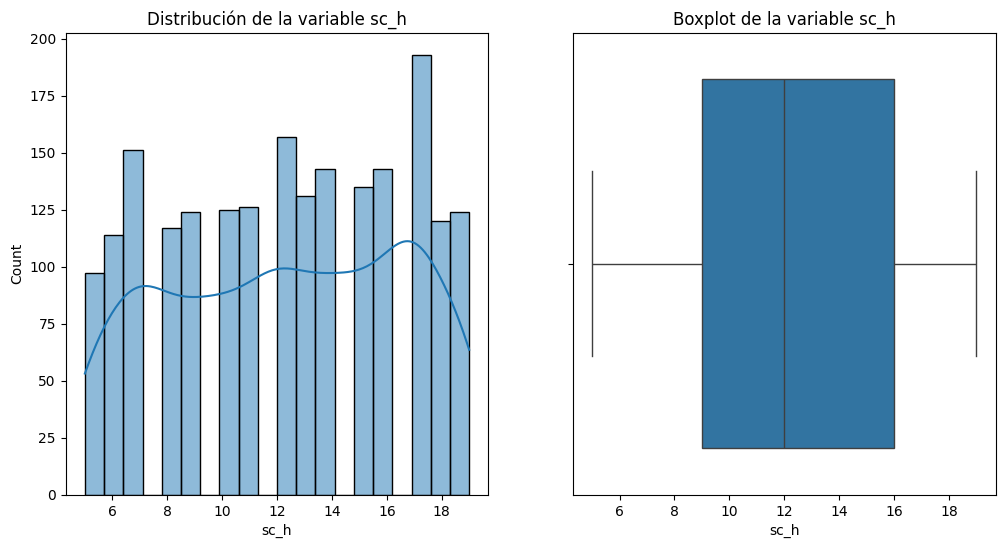

In [586]:
# Verificamos si la columna 'sc_h' existe en el DataFrame
if 'sc_h' in df.columns:
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable sc_h
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_h'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_h')

    # Boxplot de la variable sc_h
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_h'])
    plt.title('Boxplot de la variable sc_h')

    plt.show()
else:
    print("La columna 'sc_h' no se encuentra en el DataFrame")

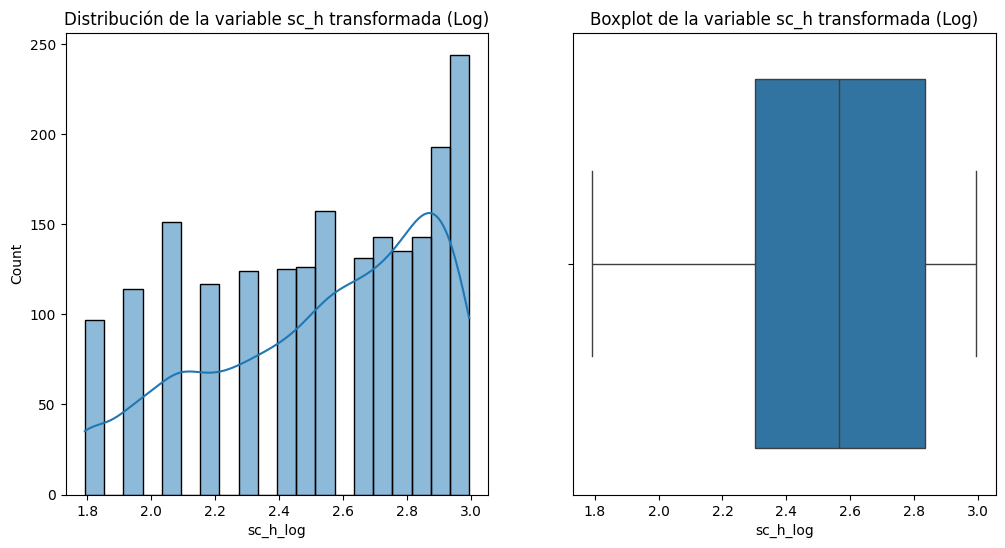

In [587]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import ndtri

# Verificamos si la columna 'sc_h' existe en el DataFrame
if 'sc_h' in df.columns:
    # Transformación Logarítmica
    df['sc_h_log'] = np.log1p(df['sc_h'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_h_log'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_h transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_h_log'])
    plt.title('Boxplot de la variable sc_h transformada (Log)')

    plt.show()
else:
    print("La columna 'sc_h' no se encuentra en el DataFrame")



VARIABLE SC W

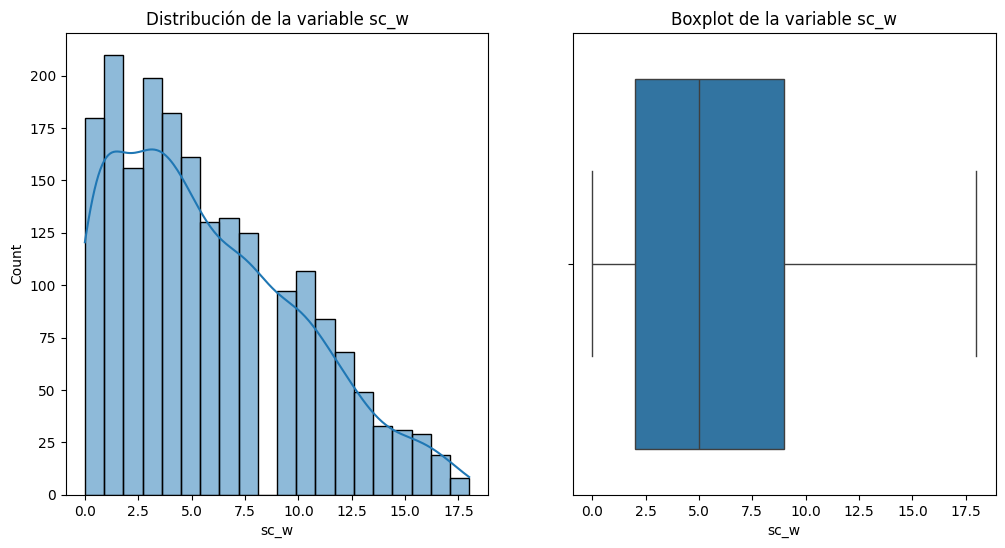

In [588]:
# Verificamos si la columna 'sc_w' existe en el DataFrame
if 'sc_w' in df.columns:
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable sc_w
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_w'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_w')

    # Boxplot de la variable sc_w
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_w'])
    plt.title('Boxplot de la variable sc_w')

    plt.show()
else:
    print("La columna 'sc_w' no se encuentra en el DataFrame")

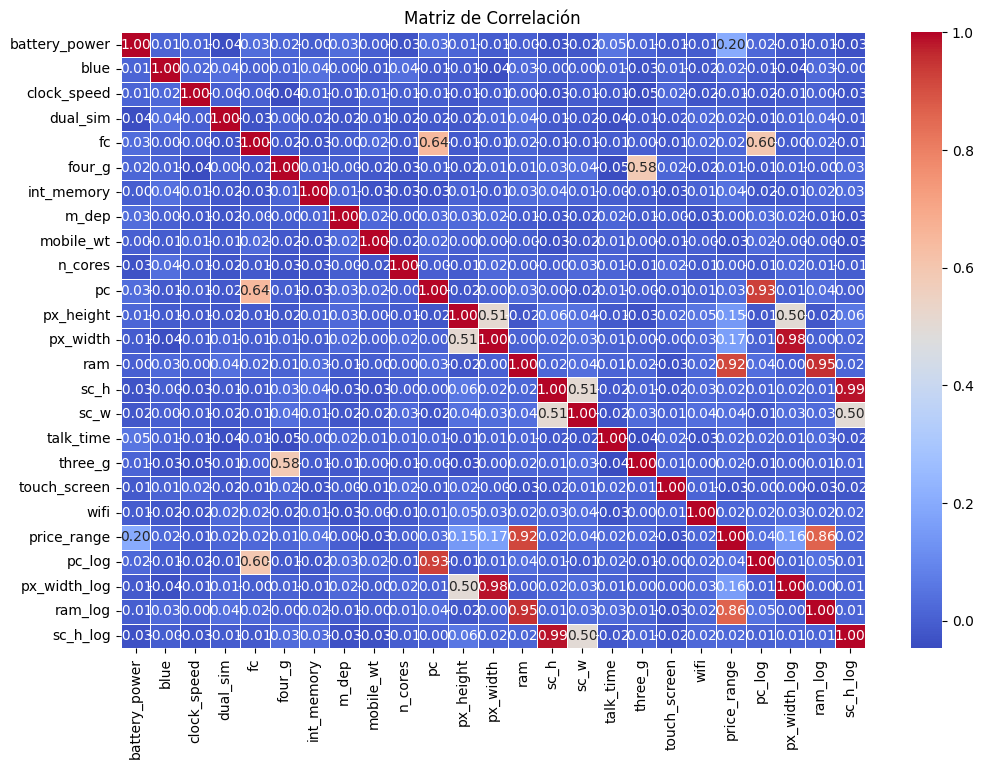

In [589]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

<H1>2DA version de modelo de regresion logistica 

In [590]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Definir las características (X) y la variable objetivo (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Inicializar Recursive Feature Elimination (RFE) con validación cruzada
selector = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# Entrenar el selector de características
selector = selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['ram_log', 'sc_h_log'], dtype='object')


In [591]:
y = df['price_range']
X = df.drop(columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'pc_log', 'px_width_log'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
lr = LogisticRegression(random_state = 42)



In [592]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [593]:
y_pred_lr = lr.predict(X_test)

In [594]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
accuracy

0.7616666666666667